# Automated Anomaly Detection
**Objective**: Understand and practice automated anomaly detection using various techniques.

**Task**: Anomaly Detection with Isolation Forest

**Steps**:
1. Data Set: Obtain a dataset of server response times.
2. Train Model: Use Isolation Forest to train a model on the response time data.
3. Detect Anomalies: Predict which response times are anomalies.
4. Evaluate Results: Assess the number of anomalies detected.

Detected 11 anomalies.


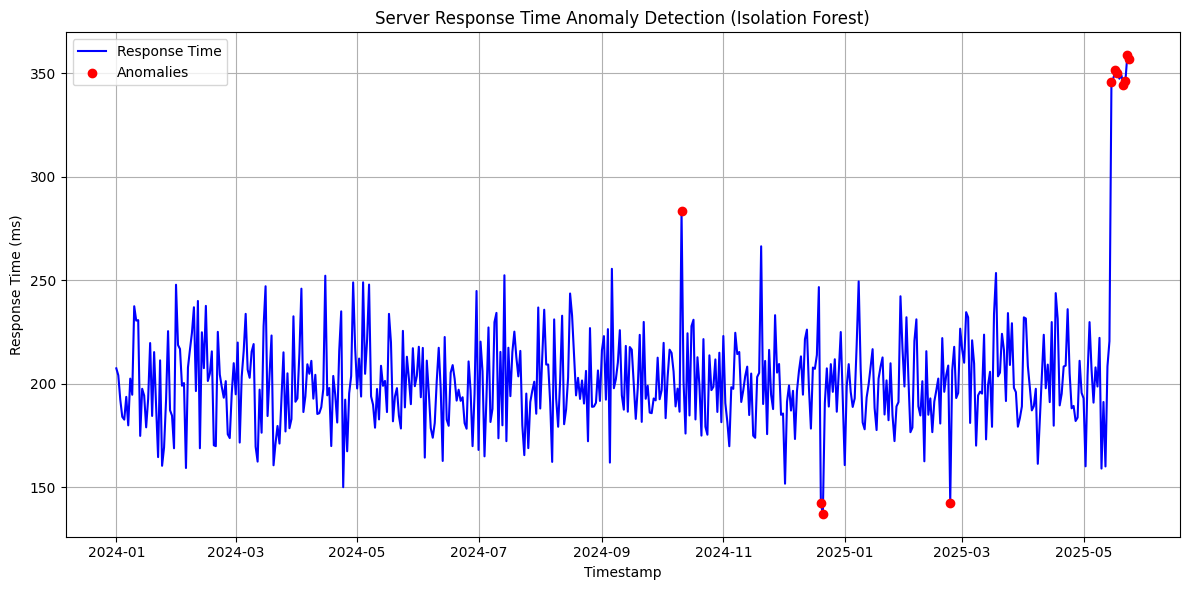

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

def load_and_validate_data():
    try:
        # Simulated dataset
        normal_data = np.random.normal(loc=200, scale=20, size=500)
        anomalies = np.random.normal(loc=350, scale=5, size=10)
        response_times = np.concatenate([normal_data, anomalies])
        dates = pd.date_range(start='2024-01-01', periods=len(response_times))

        df = pd.DataFrame({'timestamp': dates, 'response_time': response_times})

        # Basic validation
        if df['response_time'].isnull().any():
            raise ValueError("Missing values in response_time column.")
        if not pd.api.types.is_datetime64_any_dtype(df['timestamp']):
            raise TypeError("timestamp column must be datetime type.")
        if not np.issubdtype(df['response_time'].dtype, np.number):
            raise TypeError("response_time must be numeric.")

        return df
    except Exception as e:
        print(f"Data loading/validation error: {e}")
        return None

def detect_anomalies(df):
    try:
        scaler = StandardScaler()
        df['scaled_response'] = scaler.fit_transform(df[['response_time']])

        model = IsolationForest(contamination=0.02, random_state=42)
        model.fit(df[['scaled_response']])

        df['anomaly'] = model.predict(df[['scaled_response']])
        df['anomaly'] = df['anomaly'].apply(lambda x: 1 if x == -1 else 0)

        return df
    except Exception as e:
        print(f"Anomaly detection error: {e}")
        return None

def plot_anomalies(df):
    try:
        plt.figure(figsize=(12, 6))
        plt.plot(df['timestamp'], df['response_time'], label='Response Time', color='blue')
        plt.scatter(df[df['anomaly'] == 1]['timestamp'],
                    df[df['anomaly'] == 1]['response_time'],
                    color='red', label='Anomalies', zorder=5)
        plt.title("Server Response Time Anomaly Detection (Isolation Forest)")
        plt.xlabel("Timestamp")
        plt.ylabel("Response Time (ms)")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Plotting error: {e}")

# Execution
df = load_and_validate_data()
if df is not None:
    df = detect_anomalies(df)
    if df is not None:
        print(f"Detected {df['anomaly'].sum()} anomalies.")
        plot_anomalies(df)
